In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from src.utils import get_project_root

# Data Ingestion

In [7]:
import psycopg2
import pandas as pd

# Replace with your database connection details
hostname = "impress-db.cdkmywv4plta.eu-central-1.rds.amazonaws.com"
database_name = "postgres"
username = "IMPRESS_MASTER"
password = 'no idea'

print(password)

# Establish a database connection
try:
    connection = psycopg2.connect(
        host=hostname,
        database=database_name,
        user=username,
        password=password
    )

    # Define the SQL query to retrieve data from a table
    query = "SELECT * FROM online_data;"

    # Execute the query and create a Pandas DataFrame
    df = pd.read_sql_query(query, connection)

    # Display the DataFrame (you can remove this line)
    print(df.head())

except psycopg2.Error as e:
    print("Error connecting to the database:", e)

finally:
    # Close the database connection
    if connection:
        connection.close()


no idea
Error connecting to the database: connection to server at "impress-db.cdkmywv4plta.eu-central-1.rds.amazonaws.com" (3.66.205.38), port 5432 failed: FATAL:  password authentication failed for user "IMPRESS_MASTER"
connection to server at "impress-db.cdkmywv4plta.eu-central-1.rds.amazonaws.com" (3.66.205.38), port 5432 failed: FATAL:  no pg_hba.conf entry for host "95.222.30.231", user "IMPRESS_MASTER", database "postgres", no encryption



In [4]:
print(os.environ['DB_PASS'])


KeyError: 'DB_PASS'

In [4]:
project_directory = get_project_root()
data_directory = os.path.join(project_directory, 'Dataset\\')
print(data_directory)

C:\Users\Illia\Desktop\IMPRESS\Dataset\


In [4]:
offline_df = pd.read_csv(os.path.join(data_directory, "20220311_114449_impress_backup_offlinemessungen.csv"), sep=';')

online_df = pd.read_csv(os.path.join(data_directory, "20220311_114449_impress_backup_sensors.csv"), sep=';')
pd.set_option('display.max_columns', 16)
print(online_df.dtypes)
offline_df.head()

experimentnummer    float64
timestamp           float64
waschen               int64
spuelen             float64
csbeq               float64
truebung            float64
druck1              float64
druck2              float64
druck3              float64
fluss1              float64
fluss2              float64
ph                  float64
leitfaehigkeit      float64
alkalinitaet        float64
vorschlagsnummer    float64
bsbeq               float64
abs254              float64
abs360              float64
abs210              float64
reserv1             float64
reserv2             float64
dtype: object


aktivsauerstoff  anionischetenside  bsb  carbonathaerte     csb  \
0             20.0              27.30  0.0            21.5  2426.0   
1             20.0              27.30  0.0            21.5  2426.0   
2             20.0              27.30  0.0            21.5  2426.0   
3             10.0               1.88  0.0             6.8    29.5   
4             50.0             260.00  0.0            21.9  3792.0   

   leitfaehigkeit  nichtionischentenside  oberflaechenspannung  ...     ph  \
0          1105.0                  215.0                 39.90  ...  7.360   
1          1105.0                  215.0                 39.90  ...  7.360   
2          1105.0                  215.0                 39.90  ...  7.360   
3            30.0                   12.0                 61.55  ...  8.070   
4          1100.0                  660.0                 31.85  ...  6.385   

   truebung  wasserstoffperoxid  bemerkungen timestamp_probeentnahme  \
0     32.90                1.55           W1              1615803865   
1     32.90                1.55           W1              1615803865   
2     32.90                1.55           W1              1615803865   
3      1.90                0.00           S1              1615814270   
4     74.65               73.35           W1              1615545009   

   timestamp_messung  vorschlagnummer  experimentnummer  
0         1615804010              -12                12  
1         1615804010              -12                12  
2         1615804010              -12                12  
3         1615814315              -12                12  
4         1615544976              -11                11  

[5 rows x 17 columns]

In [13]:
online_df = online_df[online_df['vorschlagsnummer'] >= 0]
online_df.head()

experimentnummer     timestamp  waschen  spuelen      csbeq  truebung  \
4               1.0  1.624966e+09        0      1.0  45.758366  7.649211   
5               1.0  1.624966e+09        0      1.0  45.711973  7.676346   
6               1.0  1.624966e+09        0      1.0  45.801190  7.839979   
7               1.0  1.624966e+09        0      1.0  45.758366  7.852313   
8               1.0  1.624966e+09        0      1.0  45.715542  7.893427   

     druck1    druck2  ...  alkalinitaet  vorschlagsnummer      bsbeq  \
4  0.141451  0.165737  ...     -1.569999               3.0  30.181111   
5  0.140628  0.165041  ...     -1.532478               3.0  30.188248   
6  0.141379  0.164814  ...     -1.538865               3.0  30.125796   
7  0.140800  0.165357  ...     -1.579538               3.0  30.156130   
8  0.139941  0.164000  ...     -1.586798               3.0  30.070482   

     abs254    abs360    abs210  reserv1  reserv2  
4  0.056924  0.023622  0.211094     -0.0     -0.0  
5  0.057023  0.023672  0.211040     -0.0     -0.0  
6  0.056927  0.023640  0.210966     -0.0     -0.0  
7  0.056945  0.023703  0.211094     -0.0     -0.0  
8  0.056953  0.023500  0.211022     -0.0     -0.0  

[5 rows x 21 columns]

# EDA and Feature Extraction

In [14]:
offline_df.drop_duplicates(inplace=True)
online_df.drop_duplicates(inplace=True)

In [15]:
offline_df['experimentnummer'].unique()

array([12, 11, 10,  9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  1,  2,  3,
        4,  5,  6,  7,  8, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 50, 51,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 52, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], dtype=int64)

In [16]:
online_df['experimentnummer'].unique()

array([ 1.,  4.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])

In [17]:
np.setdiff1d(offline_df['experimentnummer'].unique(), online_df['experimentnummer'].unique())


array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [18]:
print(len(online_df), len(offline_df))

188770 171


In [19]:
online_df['waschen'].unique()

array([0, 1], dtype=int64)

In [20]:
print(len(online_df[online_df['waschen'] == 0]), len(online_df[online_df['waschen'] == 1]))

93441 95329


In [21]:
x=0
for i in range(1, 81):
    a = len(offline_df[offline_df['experimentnummer'] == i])
    print(a)
    x+=a
print(x)

5
4
4
4
4
4
4
4
6
6
4
4
4
4
4
5
7
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
171


In [22]:
offline_df[offline_df['experimentnummer'] == 19]

aktivsauerstoff  anionischetenside  bsb  carbonathaerte     csb  \
25             30.0              61.25 -1.0            39.6  2352.0   
26             10.0              19.05 -1.0            12.3   536.5   

    leitfaehigkeit  nichtionischentenside  oberflaechenspannung  ...     ph  \
25          1540.0                  260.0                 38.30  ...  7.080   
26           515.0                  110.0                 47.05  ...  7.555   

    truebung  wasserstoffperoxid  bemerkungen timestamp_probeentnahme  \
25     18.05               27.45           W1              1618480944   
26      7.45                9.10           S1              1618487664   

    timestamp_messung  vorschlagnummer  experimentnummer  
25         1618480740              -19                19  
26         1618487580              -19                19  

[2 rows x 17 columns]

In [24]:
offline_df[(offline_df['experimentnummer'] == 17) & (offline_df['bemerkungen'] == 'W1')]

aktivsauerstoff  anionischetenside  bsb  carbonathaerte     csb  \
18              40.0             251.00 -1.0            21.9  3052.0   
20              40.0             251.00 -1.0            21.9  3052.0   
21              10.0              44.40 -1.0             9.0    46.5   
102             -1.0               1.84 -1.0            -1.0    -1.0   

     leitfaehigkeit  nichtionischentenside  oberflaechenspannung  ...     ph  \
18           1049.5                  620.0                 34.10  ...  7.205   
20           1049.5                  620.0                 34.10  ...  7.205   
21            550.0                   95.0                 47.80  ...  7.465   
102            -1.0                  620.0                 36.95  ... -1.000   

     truebung  wasserstoffperoxid  bemerkungen timestamp_probeentnahme  \
18      38.45               32.70           W1              1618231882   
20      38.45               32.70           W1              1618220722   
21       4.70                7.25           W1              1618220722   
102     -1.00               -1.00           W1              1627288200   

     timestamp_messung  vorschlagnummer  experimentnummer  
18          1618231882              -17                17  
20          1618220700              -17                17  
21          1618220700              -17                17  
102         1627300800              132                17  

[4 rows x 17 columns]

In [15]:
offline_df[offline_df['ph']>=0]

aktivsauerstoff  anionischetenside  bsb  carbonathaerte     csb  \
0               20.0             27.300  0.0           21.50  2426.0   
3               10.0              1.880  0.0            6.80    29.5   
4               50.0            260.000  0.0           21.90  3792.0   
5               10.0              2.715  0.0            6.95    36.5   
6                0.0              0.000  0.0            4.65   997.0   
..               ...                ...  ...             ...     ...   
162             -1.0              0.350 -1.0           17.00   421.5   
165             -1.0             96.000 -1.0           46.00  2948.0   
166             -1.0              0.710 -1.0            8.00    20.0   
171             -1.0             95.000 -1.0            4.45  1705.0   
172             -1.0              8.600 -1.0            5.20   149.5   

     leitfaehigkeit  nichtionischentenside  oberflaechenspannung  \
0           1105.00                  215.0                 39.90   
3             30.00                   12.0                 61.55   
4           1100.00                  660.0                 31.85   
5            290.00                    4.6                 62.45   
6            280.00                    0.0                 49.00   
..              ...                    ...                   ...   
162          627.80                   70.0                 59.20   
165         1395.00                  160.0                 43.80   
166          247.60                    2.0                 70.60   
171          493.75                  110.0                 48.70   
172          249.10                   13.0                 68.70   

     peressigsaeure     ph  truebung  wasserstoffperoxid bemerkungen  \
0               1.1  7.360     32.90                1.55          W1   
3               0.0  8.070      1.90                0.00          S1   
4              49.6  6.385     74.65               73.35          W1   
5               0.0  8.465      2.10                0.00          S1   
6               0.0  7.915      7.90                0.00          W1   
..              ...    ...       ...                 ...         ...   
162            -1.0  8.400      1.10               -1.00          S1   
165            -1.0  8.020     23.75               -1.00          W1   
166            -1.0  7.060      1.65               -1.00          S1   
171            -1.0  7.400     19.40               -1.00          W1   
172            -1.0  7.940      3.20               -1.00          S1   

     timestamp_probeentnahme  timestamp_messung  vorschlagnummer  \
0                 1615803865         1615804010              -12   
3                 1615814270         1615814315              -12   
4                 1615545009         1615544976              -11   
5                 1615558576         1615558552              -11   
6                 1615286670         1615285850              -10   
..                       ...                ...              ...   
162               1641856323         1641856424              300   
165               1642374604         1642374794              312   
166               1642374708         1642374836              312   
171               1643152266         1643152377              330   
172               1643152311         1643152413              330   

     experimentnummer  
0                  12  
3                  12  
4                  11  
5                  11  
6                  10  
..                ...  
162                75  
165                77  
166                77  
171                80  
172                80  

[117 rows x 17 columns]

In [16]:
offline_df[offline_df['vorschlagnummer']>0]

aktivsauerstoff  anionischetenside  bsb  carbonathaerte     csb  \
73              -1.0               0.00 -1.0           43.40  2346.0   
74              -1.0               0.00 -1.0           11.00   336.0   
75              -1.0               0.00 -1.0           30.20    -1.0   
76              -1.0             744.00 -1.0           35.60  8892.0   
77              -1.0               3.20 -1.0            6.70    48.5   
..               ...                ...  ...             ...     ...   
168             -1.0              -1.00 -1.0            9.00    -1.0   
169             -1.0               0.46 -1.0           32.00    -1.0   
170             -1.0              -1.00 -1.0            5.60    -1.0   
171             -1.0              95.00 -1.0            4.45  1705.0   
172             -1.0               8.60 -1.0            5.20   149.5   

     leitfaehigkeit  nichtionischentenside  oberflaechenspannung  \
73          1700.00                 140.00                 45.95   
74           470.00                  45.00                 58.30   
75          1265.00                 180.00                 44.20   
76          1745.00                 880.00                 32.95   
77           465.00                   5.85                 67.15   
..              ...                    ...                   ...   
168           -1.00                   5.45                 69.90   
169           -1.00                 150.00                 55.10   
170           -1.00                   2.65                 70.90   
171          493.75                 110.00                 48.70   
172          249.10                  13.00                 68.70   

     peressigsaeure     ph  truebung  wasserstoffperoxid bemerkungen  \
73             -1.0  7.530     22.45                -1.0          W1   
74             -1.0  8.080      7.60                -1.0          S1   
75             -1.0  6.910     42.60                -1.0          W1   
76             -1.0  7.920     46.55                -1.0          W1   
77             -1.0  7.645      0.80                -1.0          S1   
..              ...    ...       ...                 ...         ...   
168            -1.0 -1.000     -1.00                 1.0          S1   
169            -1.0 -1.000     -1.00                -1.0          W1   
170            -1.0 -1.000     -1.00                -1.0          S1   
171            -1.0  7.400     19.40                -1.0          W1   
172            -1.0  7.940      3.20                -1.0          S1   

     timestamp_probeentnahme  timestamp_messung  vorschlagnummer  \
73                1624959961         1624960652                3   
74                1624965721         1624966472                3   
75                1625043502         1625044172                8   
76                1625478600         1625490000               21   
77                1625487000         1625490000               21   
..                       ...                ...              ...   
168               1642547650         1642547665              318   
169               1642979491         1642979616              324   
170               1642979603         1642979679              324   
171               1643152266         1643152377              330   
172               1643152311         1643152413              330   

     experimentnummer  
73                  1  
74                  1  
75                  2  
76                  4  
77                  4  
..                ...  
168                78  
169                79  
170                79  
171                80  
172                80  

[100 rows x 17 columns]

In [17]:
len(offline_df['experimentnummer'].unique())

63

In [18]:
offline_df.dtypes

aktivsauerstoff            float64
anionischetenside          float64
bsb                        float64
carbonathaerte             float64
csb                        float64
leitfaehigkeit             float64
nichtionischentenside      float64
oberflaechenspannung       float64
peressigsaeure             float64
ph                         float64
truebung                   float64
wasserstoffperoxid         float64
bemerkungen                 object
timestamp_probeentnahme      int64
timestamp_messung            int64
vorschlagnummer              int64
experimentnummer             int64
dtype: object

In [19]:
positive_parameters = [
    'bsb',
    'carbonathaerte',
    'csb',
    'leitfaehigkeit',
    'oberflaechenspannung',
    'peressigsaeure',
    'ph',
    'truebung',
    'wasserstoffperoxid',
]

# Dropping rows with negative values in the specified parameters
offline_positive = offline_df[(offline_df[positive_parameters] != -1).all(axis=1)].dropna()

In [20]:
offline_positive

aktivsauerstoff  anionischetenside    bsb  carbonathaerte     csb  \
0               20.0             27.300    0.0           21.50  2426.0   
3               10.0              1.880    0.0            6.80    29.5   
4               50.0            260.000    0.0           21.90  3792.0   
5               10.0              2.715    0.0            6.95    36.5   
6                0.0              0.000    0.0            4.65   997.0   
7                0.0              0.000    0.0            6.35   171.0   
8               20.0             50.500    0.0           38.40  2175.0   
9               10.0              1.090    0.0            6.90   119.0   
39              -1.0            146.000  860.0           10.35  4655.0   
40              -1.0             25.950  270.0            6.95   662.0   
109            200.0              0.000    0.0            0.00     0.0   

     leitfaehigkeit  nichtionischentenside  oberflaechenspannung  \
0            1105.0                  215.0                 39.90   
3              30.0                   12.0                 61.55   
4            1100.0                  660.0                 31.85   
5             290.0                    4.6                 62.45   
6             280.0                    0.0                 49.00   
7             450.0                    0.0                 59.85   
8            1525.0                  300.0                 36.85   
9             475.0                    5.8                 64.45   
39           1035.0                  240.0                 37.35   
40            490.0                   65.0                 47.55   
109             0.0                    0.0                 72.00   

     peressigsaeure     ph  truebung  wasserstoffperoxid bemerkungen  \
0              1.10  7.360     32.90                1.55          W1   
3              0.00  8.070      1.90                0.00          S1   
4             49.60  6.385     74.65               73.35          W1   
5              0.00  8.465      2.10                0.00          S1   
6              0.00  7.915      7.90                0.00          W1   
7              0.00  7.755      5.75                0.00          S1   
8             39.30  7.340      8.65               31.50          W1   
9              0.00  7.755      0.70                0.00          S1   
39            53.00  5.200    172.95               83.00          W1   
40             5.35  6.340     65.00               12.25          S1   
109            0.00  7.600    500.00              200.00        test   

     timestamp_probeentnahme  timestamp_messung  vorschlagnummer  \
0                 1615803865         1615804010              -12   
3                 1615814270         1615814315              -12   
4                 1615545009         1615544976              -11   
5                 1615558576         1615558552              -11   
6                 1615286670         1615285850              -10   
7                 1615293147         1614688210              -10   
8                 1615209113         1615208786               -9   
9                 1615212995         1615212662               -9   
39                1614341040         1614337500               -4   
40                1614344400         1614344040               -4   
109               1634218204         1634304608                1   

     experimentnummer  
0                  12  
3                  12  
4                  11  
5                  11  
6                  10  
7                  10  
8                   9  
9                   9  
39                  4  
40                  4  
109                 1

In [21]:
print(online_df)
positive_parameters = [
    'csbeq',
    'truebung',
    'druck1',
    'druck2',
    'druck3',
    'fluss1',
    'fluss2',
    'ph',
    'leitfaehigkeit',
    'alkalinitaet',
    'bsbeq',
    'abs254',
    'abs360',
    'abs210',
    'reserv1',
    'reserv2'
]

online_df = online_df[(online_df[positive_parameters] != -1).all(axis=1)].dropna()

        experimentnummer     timestamp  waschen  spuelen      csbeq  truebung  \
4                    1.0  1.624966e+09        0      1.0  45.758366  7.649211   
5                    1.0  1.624966e+09        0      1.0  45.711973  7.676346   
6                    1.0  1.624966e+09        0      1.0  45.801190  7.839979   
7                    1.0  1.624966e+09        0      1.0  45.758366  7.852313   
8                    1.0  1.624966e+09        0      1.0  45.715542  7.893427   
...                  ...           ...      ...      ...        ...       ...   
312146               1.0  1.646837e+09        0      1.0  30.486232  5.823761   
312147               1.0  1.646837e+09        0      1.0  30.580802  5.640394   
312148               1.0  1.646837e+09        0      1.0  30.614705  5.632993   
312149               1.0  1.646837e+09        0      1.0  30.459467  5.629704   
312150               1.0  1.646837e+09        0      1.0  30.587940  5.660951   

          druck1    druck2 

In [22]:
online_df[online_df.waschen == 1]

experimentnummer     timestamp  waschen  spuelen        csbeq  \
1804                 1.0  1.624961e+09        1      0.0   137.459008   
1816                 4.0  1.625479e+09        1      0.0  1365.384604   
1817                 4.0  1.625479e+09        1      0.0  1307.820949   
1818                 4.0  1.625480e+09        1      0.0  1373.100208   
1819                 4.0  1.625480e+09        1      0.0  1373.121620   
...                  ...           ...      ...      ...          ...   
310346               1.0  1.646831e+09        1      0.0    40.988835   
310347               1.0  1.646831e+09        1      0.0    40.940658   
310348               1.0  1.646831e+09        1      0.0    40.969207   
310349               1.0  1.646831e+09        1      0.0    41.024522   
310350               1.0  1.646831e+09        1      0.0    40.944227   

         truebung    druck1    druck2    druck3    fluss1  ...         ph  \
1804    20.244818  0.134939  0.167130  0.114235  0.667607  ...   7.011495   
1816    20.197126  0.142292  0.304253  0.155552  0.678873  ...   7.090122   
1817    23.428667  0.139579  0.295723  0.152839  0.662213  ...   7.091838   
1818    26.544267  0.138530  0.299739  0.150189  0.698301  ...   7.106607   
1819    29.714137  0.136567  0.296709  0.147276  0.657924  ...   7.122483   
...           ...       ...       ...       ...       ...  ...        ...   
310346  18.691541  0.134450  0.157180  0.112462  0.653050  ...  11.660612   
310347  18.712920  0.133618  0.155118  0.110635  0.622339  ...  11.661395   
310348  18.665228  0.134921  0.156592  0.112272  0.631085  ...  11.661050   
310349  18.744166  0.134993  0.156565  0.112326  0.663253  ...  11.665539   
310350  18.222022  0.136178  0.157443  0.113095  0.675347  ...  11.661671   

        leitfaehigkeit  alkalinitaet  vorschlagsnummer       bsbeq    abs254  \
1804        769.201459     -1.245607               3.0   44.250602  0.128446   
1816       1010.383208     -0.795297              21.0  331.571889  0.267029   
1817       1001.469735     -0.942684              21.0  331.257845  0.495073   
1818        978.223991     -1.268704              21.0  333.104638  0.283637   
1819        988.592893     -0.924930              21.0  333.627449  0.276223   
...                ...           ...               ...         ...       ...   
310346     4026.239565     -0.144338               0.0   30.191817  0.059659   
310347     4029.569809     -0.144944               0.0   30.113306  0.059623   
310348     4033.878569     -0.145729               0.0   30.179327  0.059710   
310349     4037.422607     -0.146632               0.0   30.091894  0.059674   
310350     2883.515578     -0.362762               0.0   30.218582  0.059717   

          abs360    abs210  reserv1  reserv2  
1804    0.041226  0.520205     -0.0     -0.0  
1816    0.072895  2.083357     -0.0     -0.0  
1817    0.269937  2.199407     -0.0     -0.0  
1818    0.084528  2.118807     -0.0     -0.0  
1819    0.075591  2.105030     -0.0     -0.0  
...          ...       ...      ...      ...  
310346  0.010626  0.825592     -0.0     -0.0  
310347  0.010520  0.825592     -0.0     -0.0  
310348  0.010575  0.825574     -0.0     -0.0  
310349  0.010498  0.825560     -0.0     -0.0  
310350  0.010514  0.825571     -0.0     -0.0  

[95329 rows x 21 columns]

In [23]:
online_df[(online_df.waschen == 1) & (online_df.spuelen == 1)]

Empty DataFrame
Columns: [experimentnummer, timestamp, waschen, spuelen, csbeq, truebung, druck1, druck2, druck3, fluss1, fluss2, ph, leitfaehigkeit, alkalinitaet, vorschlagsnummer, bsbeq, abs254, abs360, abs210, reserv1, reserv2]
Index: []

[0 rows x 21 columns]

In [24]:
online_df[(online_df.waschen == 0) & (online_df.spuelen == 0)]

Empty DataFrame
Columns: [experimentnummer, timestamp, waschen, spuelen, csbeq, truebung, druck1, druck2, druck3, fluss1, fluss2, ph, leitfaehigkeit, alkalinitaet, vorschlagsnummer, bsbeq, abs254, abs360, abs210, reserv1, reserv2]
Index: []

[0 rows x 21 columns]

In [25]:
online_df['experimentnummer'].unique()

array([ 1.,  4.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])

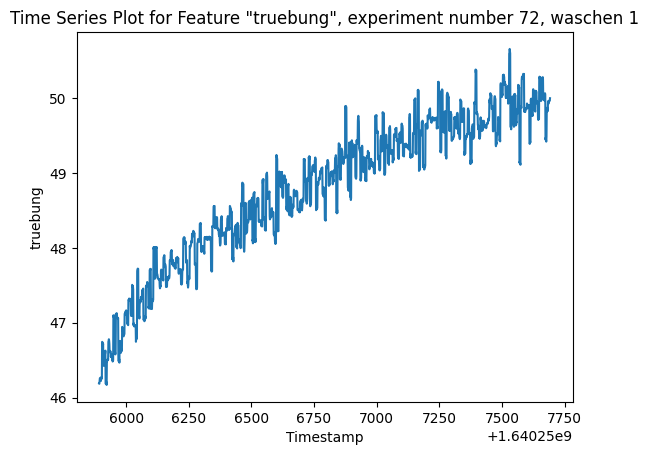

In [26]:
def plot_timeseries(online_df, experiment_number, waschen, y_label):
    experiment_data = online_df[(online_df['experimentnummer'] == experiment_number) & (online_df['waschen'] == waschen)]
    plt.figure()
    plt.plot(experiment_data['timestamp'], experiment_data[y_label])
    plt.xlabel('Timestamp')
    plt.ylabel(y_label)
    plt.title('Time Series Plot for Feature "{0}", experiment number {1}, waschen {2}'.format(y_label, experiment_number, waschen))
    plt.show()

plot_timeseries(online_df, 72, 1, 'truebung')

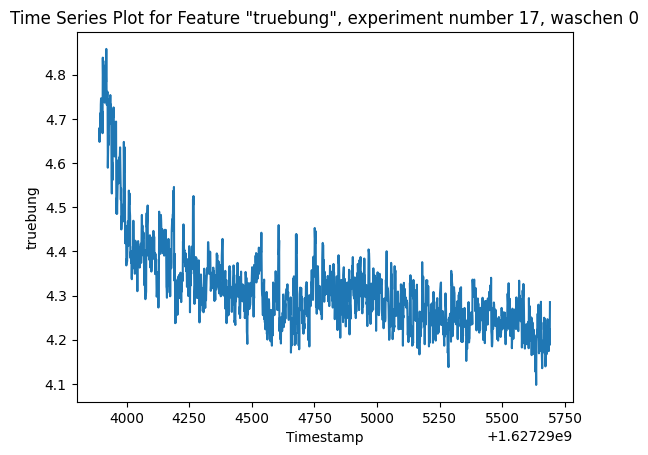

In [27]:
plot_timeseries(online_df, 17, 0, 'truebung')

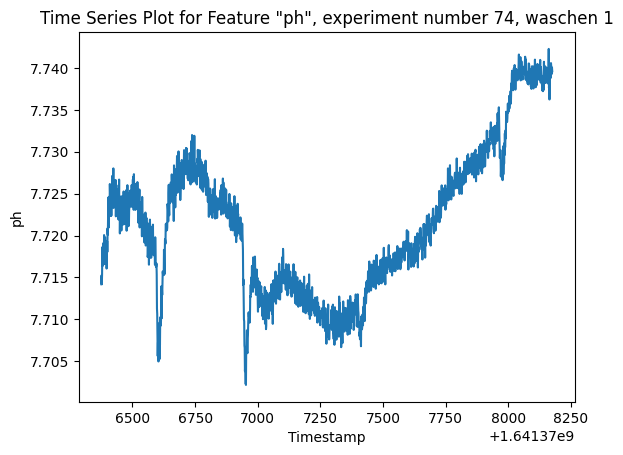

In [28]:
plot_timeseries(online_df, 74, 1, 'ph')

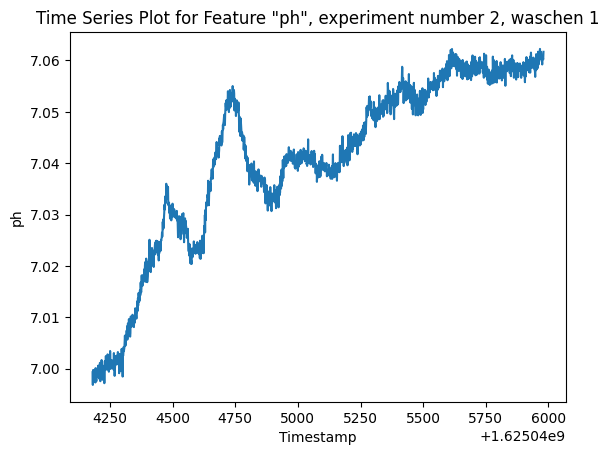

In [29]:
plot_timeseries(online_df, 2, 1, 'ph')

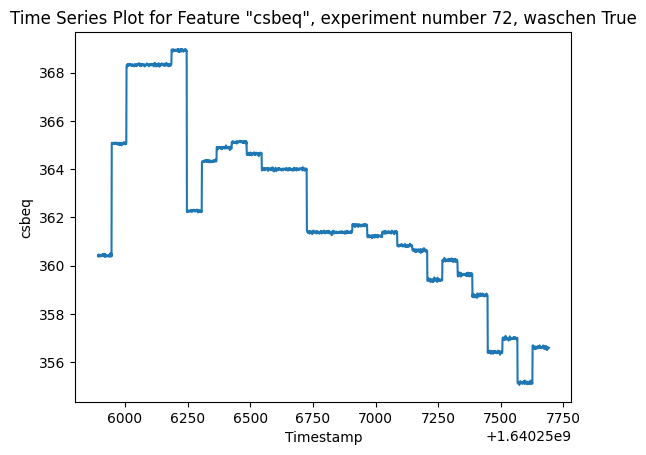

In [30]:
plot_timeseries(online_df, 72, True, 'csbeq')

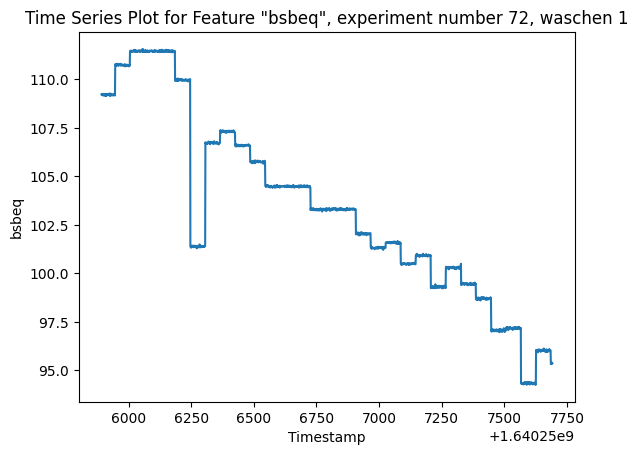

In [31]:
plot_timeseries(online_df, 72, 1, 'bsbeq')

Seems like data is not stable across the timeline. It should make sense to use time series models, but we don't have sufficient data to do so. Otherwise, calculating statistics of each feature and using it as an input to clasical ML model seems reasonable. Although in a longer run with more data, time series models might outperform.

In [32]:
online_df.columns

Index(['experimentnummer', 'timestamp', 'waschen', 'spuelen', 'csbeq',
       'truebung', 'druck1', 'druck2', 'druck3', 'fluss1', 'fluss2', 'ph',
       'leitfaehigkeit', 'alkalinitaet', 'vorschlagsnummer', 'bsbeq', 'abs254',
       'abs360', 'abs210', 'reserv1', 'reserv2'],
      dtype='object')

In [33]:
online_df = online_df.drop(columns=['timestamp', 'spuelen', 'vorschlagsnummer'])
stat_functions = ['mean', 'std', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: (x.iloc[-1] - x.iloc[0]) / len(x)]
online_df = online_df.groupby(['experimentnummer', 'waschen']).agg(stat_functions)
online_df.columns = [f'{col}_percentile25' if stat == '<lambda_0>' else
                          f'{col}_percentile75' if stat == '<lambda_1>' else
                          f'{col}_trend' if stat == '<lambda_2>' else
                          f'{col}_{stat}' for col, stat in online_df.columns]
online_df.head()


csbeq_mean   csbeq_std  csbeq_median  \
experimentnummer waschen                                         
1.0              0         49.743043   27.459468     30.552253   
                 1        124.001675  125.444994     41.200279   
2.0              0         36.883188    0.433964     36.928578   
                 1        257.444931    1.131618    257.469146   
3.0              0         53.560584    0.383185     53.567514   

                          csbeq_percentile25  csbeq_percentile75  csbeq_trend  \
experimentnummer waschen                                                        
1.0              0                 30.505860           88.792996    -0.002809   
                 1                 30.536194          303.007278    -0.017873   
2.0              0                 36.620334           37.216748     0.000228   
                 1                256.379361          258.298864    -0.002665   
3.0              0                 53.332874           53.850331     0.000214   

                          truebung_mean  truebung_std  truebung_median  \
experimentnummer waschen                                                 
1.0              0             6.980287      0.870855         6.688794   
                 1            23.149326      2.720573        24.193382   
2.0              0             5.747559      0.096233         5.729200   
                 1            43.154555      0.129214        43.145180   
3.0              0             4.264991      0.063613         4.266373   

                          truebung_percentile25  ...  reserv1_median  \
experimentnummer waschen                         ...                   
1.0              0                     6.241477  ...            -0.0   
                 1                    20.604974  ...            -0.0   
2.0              0                     5.682330  ...            -0.0   
                 1                    43.066036  ...            -0.0   
3.0              0                     4.217859  ...            -0.0   

                          reserv1_percentile25  reserv1_percentile75  \
experimentnummer waschen                                               
1.0              0                        -0.0                  -0.0   
                 1                        -0.0                  -0.0   
2.0              0                        -0.0                  -0.0   
                 1                        -0.0                  -0.0   
3.0              0                        -0.0                  -0.0   

                          reserv1_trend  reserv2_mean  reserv2_std  \
experimentnummer waschen                                             
1.0              0                  0.0           0.0          0.0   
                 1                  0.0           0.0          0.0   
2.0              0                  0.0           0.0          0.0   
                 1                  0.0           0.0          0.0   
3.0              0                  0.0           0.0          0.0   

                          reserv2_median  reserv2_percentile25  \
experimentnummer waschen                                         
1.0              0                  -0.0                  -0.0   
                 1                  -0.0                  -0.0   
2.0              0                  -0.0                  -0.0   
                 1                  -0.0                  -0.0   
3.0              0                  -0.0                  -0.0   

                          reserv2_percentile75  reserv2_trend  
experimentnummer waschen                                       
1.0              0                        -0.0            0.0  
                 1                        -0.0            0.0  
2.0              0                        -0.0            0.0  
                 1                        -0.0            0.0  
3.0              0                        -0.0            0.0  

[5 rows x 96 columns]

In [34]:
offline_grouped = offline_df.groupby(['experimentnummer', 'bemerkungen']).mean().reset_index()
mapping = {'S1': 0, 'W1': 1}
offline_grouped['waschen'] = offline_grouped['bemerkungen'].map(mapping)
print(offline_grouped.columns)
offline_df = offline_grouped[offline_grouped['bemerkungen'].isin(['S1', 'W1'])]
offline_df = offline_df.drop(columns=['bemerkungen'])


Index(['experimentnummer', 'bemerkungen', 'aktivsauerstoff',
       'anionischetenside', 'bsb', 'carbonathaerte', 'csb', 'leitfaehigkeit',
       'nichtionischentenside', 'oberflaechenspannung', 'peressigsaeure', 'ph',
       'truebung', 'wasserstoffperoxid', 'timestamp_probeentnahme',
       'timestamp_messung', 'vorschlagnummer', 'waschen'],
      dtype='object')


In [35]:
offline_df

experimentnummer  aktivsauerstoff  anionischetenside    bsb  \
0                   1              4.5              -0.50  -1.00   
1                   1              9.5              -0.50  -1.00   
3                   2             -1.0              -0.50  14.00   
4                   2             -1.0              -0.50  -1.00   
5                   3              4.5               5.55   8.25   
..                ...              ...                ...    ...   
123                78             -1.0               2.22  -1.00   
124                79             -1.0              -1.00  -1.00   
125                79             -1.0               0.46  -1.00   
126                80             -1.0               8.60  -1.00   
127                80             -1.0              95.00  -1.00   

     carbonathaerte      csb  leitfaehigkeit  nichtionischentenside  \
0              9.20   348.25          595.00                  22.00   
1             21.20  1856.75         1210.00                  69.50   
3              7.30   137.25          392.50                  14.50   
4             14.60   460.75          770.00                  89.50   
5              9.25   399.00          575.00                  44.25   
..              ...      ...             ...                    ...   
123           34.00    -1.00           -1.00                  65.00   
124            5.60    -1.00           -1.00                   2.65   
125           32.00    -1.00           -1.00                 150.00   
126            5.20   149.50          249.10                  13.00   
127            4.45  1705.00          493.75                 110.00   

     oberflaechenspannung  peressigsaeure      ph  truebung  \
0                  55.700           2.675  7.4375    12.200   
1                  48.325          38.125  6.2575    47.525   
3                  60.950          -1.000  8.0550     3.850   
4                  52.325          -1.000  7.3000    26.550   
5                  60.775           0.050  7.4525     0.050   
..                    ...             ...     ...       ...   
123                52.300          -1.000 -1.0000    -1.000   
124                70.900          -1.000 -1.0000    -1.000   
125                55.100          -1.000 -1.0000    -1.000   
126                68.700          -1.000  7.9400     3.200   
127                48.700          -1.000  7.4000    19.400   

     wasserstoffperoxid  timestamp_probeentnahme  timestamp_messung  \
0                 6.050             1.619457e+09       1.619457e+09   
1                36.425             1.619454e+09       1.619455e+09   
3                -1.000             1.619614e+09       1.619612e+09   
4                -1.000             1.619607e+09       1.619605e+09   
5                -0.225             1.619700e+09       1.619701e+09   
..                  ...                      ...                ...   
123               1.000             1.642548e+09       1.642548e+09   
124              -1.000             1.642980e+09       1.642980e+09   
125              -1.000             1.642979e+09       1.642980e+09   
126              -1.000             1.643152e+09       1.643152e+09   
127              -1.000             1.643152e+09       1.643152e+09   

     vorschlagnummer  waschen  
0                1.0      0.0  
1                1.0      1.0  
3                3.0      0.0  
4                3.0      1.0  
5                5.0      0.0  
..               ...      ...  
123            318.0      1.0  
124            324.0      0.0  
125            324.0      1.0  
126            330.0      0.0  
127            330.0      1.0  

[125 rows x 17 columns]

In [36]:
x=0
for i in range(1, 81):
    a = len(offline_df[offline_df['experimentnummer'] == i])
    print(i, a)
    x+=a
print(x)

1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 2
51 2
52 2
53 2
54 2
55 2
56 1
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
125


In [37]:
offline_df = offline_df.loc[:, ['experimentnummer', 'waschen', 'oberflaechenspannung', 'anionischetenside', 'nichtionischentenside']]

merged_data = pd.merge(offline_df, online_df, left_on=['experimentnummer', 'waschen'], right_on=['experimentnummer', 'waschen'], how='inner')
merged_data = merged_data.reset_index(drop=True)
merged_data

experimentnummer  waschen  oberflaechenspannung  anionischetenside  \
0                  1      0.0                55.700              -0.50   
1                  1      1.0                48.325              -0.50   
2                  2      0.0                60.950              -0.50   
3                  2      1.0                52.325              -0.50   
4                  3      0.0                60.775               5.55   
..               ...      ...                   ...                ...   
92                78      1.0                52.300               2.22   
93                79      0.0                70.900              -1.00   
94                79      1.0                55.100               0.46   
95                80      0.0                68.700               8.60   
96                80      1.0                48.700              95.00   

    nichtionischentenside  csbeq_mean   csbeq_std  csbeq_median  \
0                   22.00   49.743043   27.459468     30.552253   
1                   69.50  124.001675  125.444994     41.200279   
2                   14.50   36.883188    0.433964     36.928578   
3                   89.50  257.444931    1.131618    257.469146   
4                   44.25   53.560584    0.383185     53.567514   
..                    ...         ...         ...           ...   
92                  65.00  351.020751    3.677535    350.802621   
93                   2.65   44.890021    0.406179     44.923297   
94                 150.00  351.213623    3.993364    350.911465   
95                  13.00   64.093953    0.544614     63.985363   
96                 110.00  268.365221   10.010462    268.982596   

    csbeq_percentile25  csbeq_percentile75  ...  reserv1_median  \
0            30.505860           88.792996  ...            -0.0   
1            30.536194          303.007278  ...            -0.0   
2            36.620334           37.216748  ...            -0.0   
3           256.379361          258.298864  ...            -0.0   
4            53.332874           53.850331  ...            -0.0   
..                 ...                 ...  ...             ...   
92          347.554674          353.735631  ...            -0.0   
93           44.561969           45.163290  ...            -0.0   
94          349.467042          352.589638  ...            -0.0   
95           63.814066           64.421633  ...            -0.0   
96          266.992611          273.292222  ...            -0.0   

    reserv1_percentile25  reserv1_percentile75  reserv1_trend  reserv2_mean  \
0                   -0.0                  -0.0            0.0           0.0   
1                   -0.0                  -0.0            0.0           0.0   
2                   -0.0                  -0.0            0.0           0.0   
3                   -0.0                  -0.0            0.0           0.0   
4                   -0.0                  -0.0            0.0           0.0   
..                   ...                   ...            ...           ...   
92                  -0.0                  -0.0            0.0           0.0   
93                  -0.0                  -0.0            0.0           0.0   
94                  -0.0                  -0.0            0.0           0.0   
95                  -0.0                  -0.0            0.0           0.0   
96                  -0.0                  -0.0            0.0           0.0   

    reserv2_std  reserv2_median  reserv2_percentile25  reserv2_percentile75  \
0           0.0            -0.0                  -0.0                  -0.0   
1           0.0            -0.0                  -0.0                  -0.0   
2           0.0            -0.0                  -0.0                  -0.0   
3           0.0            -0.0                  -0.0                  -0.0   
4           0.0            -0.0                  -0.0                  -0.0   
..          ...             ...                   ...                   ...   
92 

In [38]:
merged_data.columns

Index(['experimentnummer', 'waschen', 'oberflaechenspannung',
       'anionischetenside', 'nichtionischentenside', 'csbeq_mean', 'csbeq_std',
       'csbeq_median', 'csbeq_percentile25', 'csbeq_percentile75',
       ...
       'reserv1_median', 'reserv1_percentile25', 'reserv1_percentile75',
       'reserv1_trend', 'reserv2_mean', 'reserv2_std', 'reserv2_median',
       'reserv2_percentile25', 'reserv2_percentile75', 'reserv2_trend'],
      dtype='object', length=101)

In [46]:
mean_columns = [col for col in merged_data.columns if '_mean' in col] + ['waschen', 'oberflaechenspannung', 'anionischetenside', 'nichtionischentenside']
df_mean_only = merged_data[mean_columns]
sns.pairplot(df_mean_only, hue='waschen')

KeyboardInterrupt: 

: 

<Axes: >

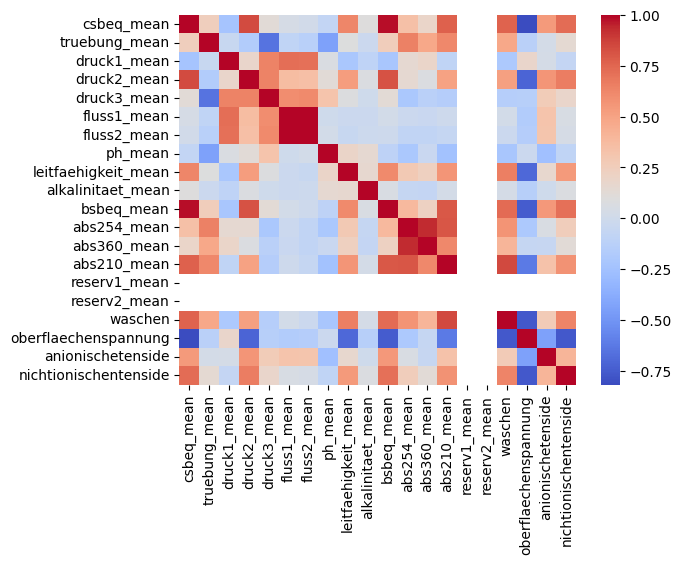

In [ ]:
sns.heatmap(df_mean_only.corr(), cmap='coolwarm')

c:\Users\Illia\Desktop\IMPRESS\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


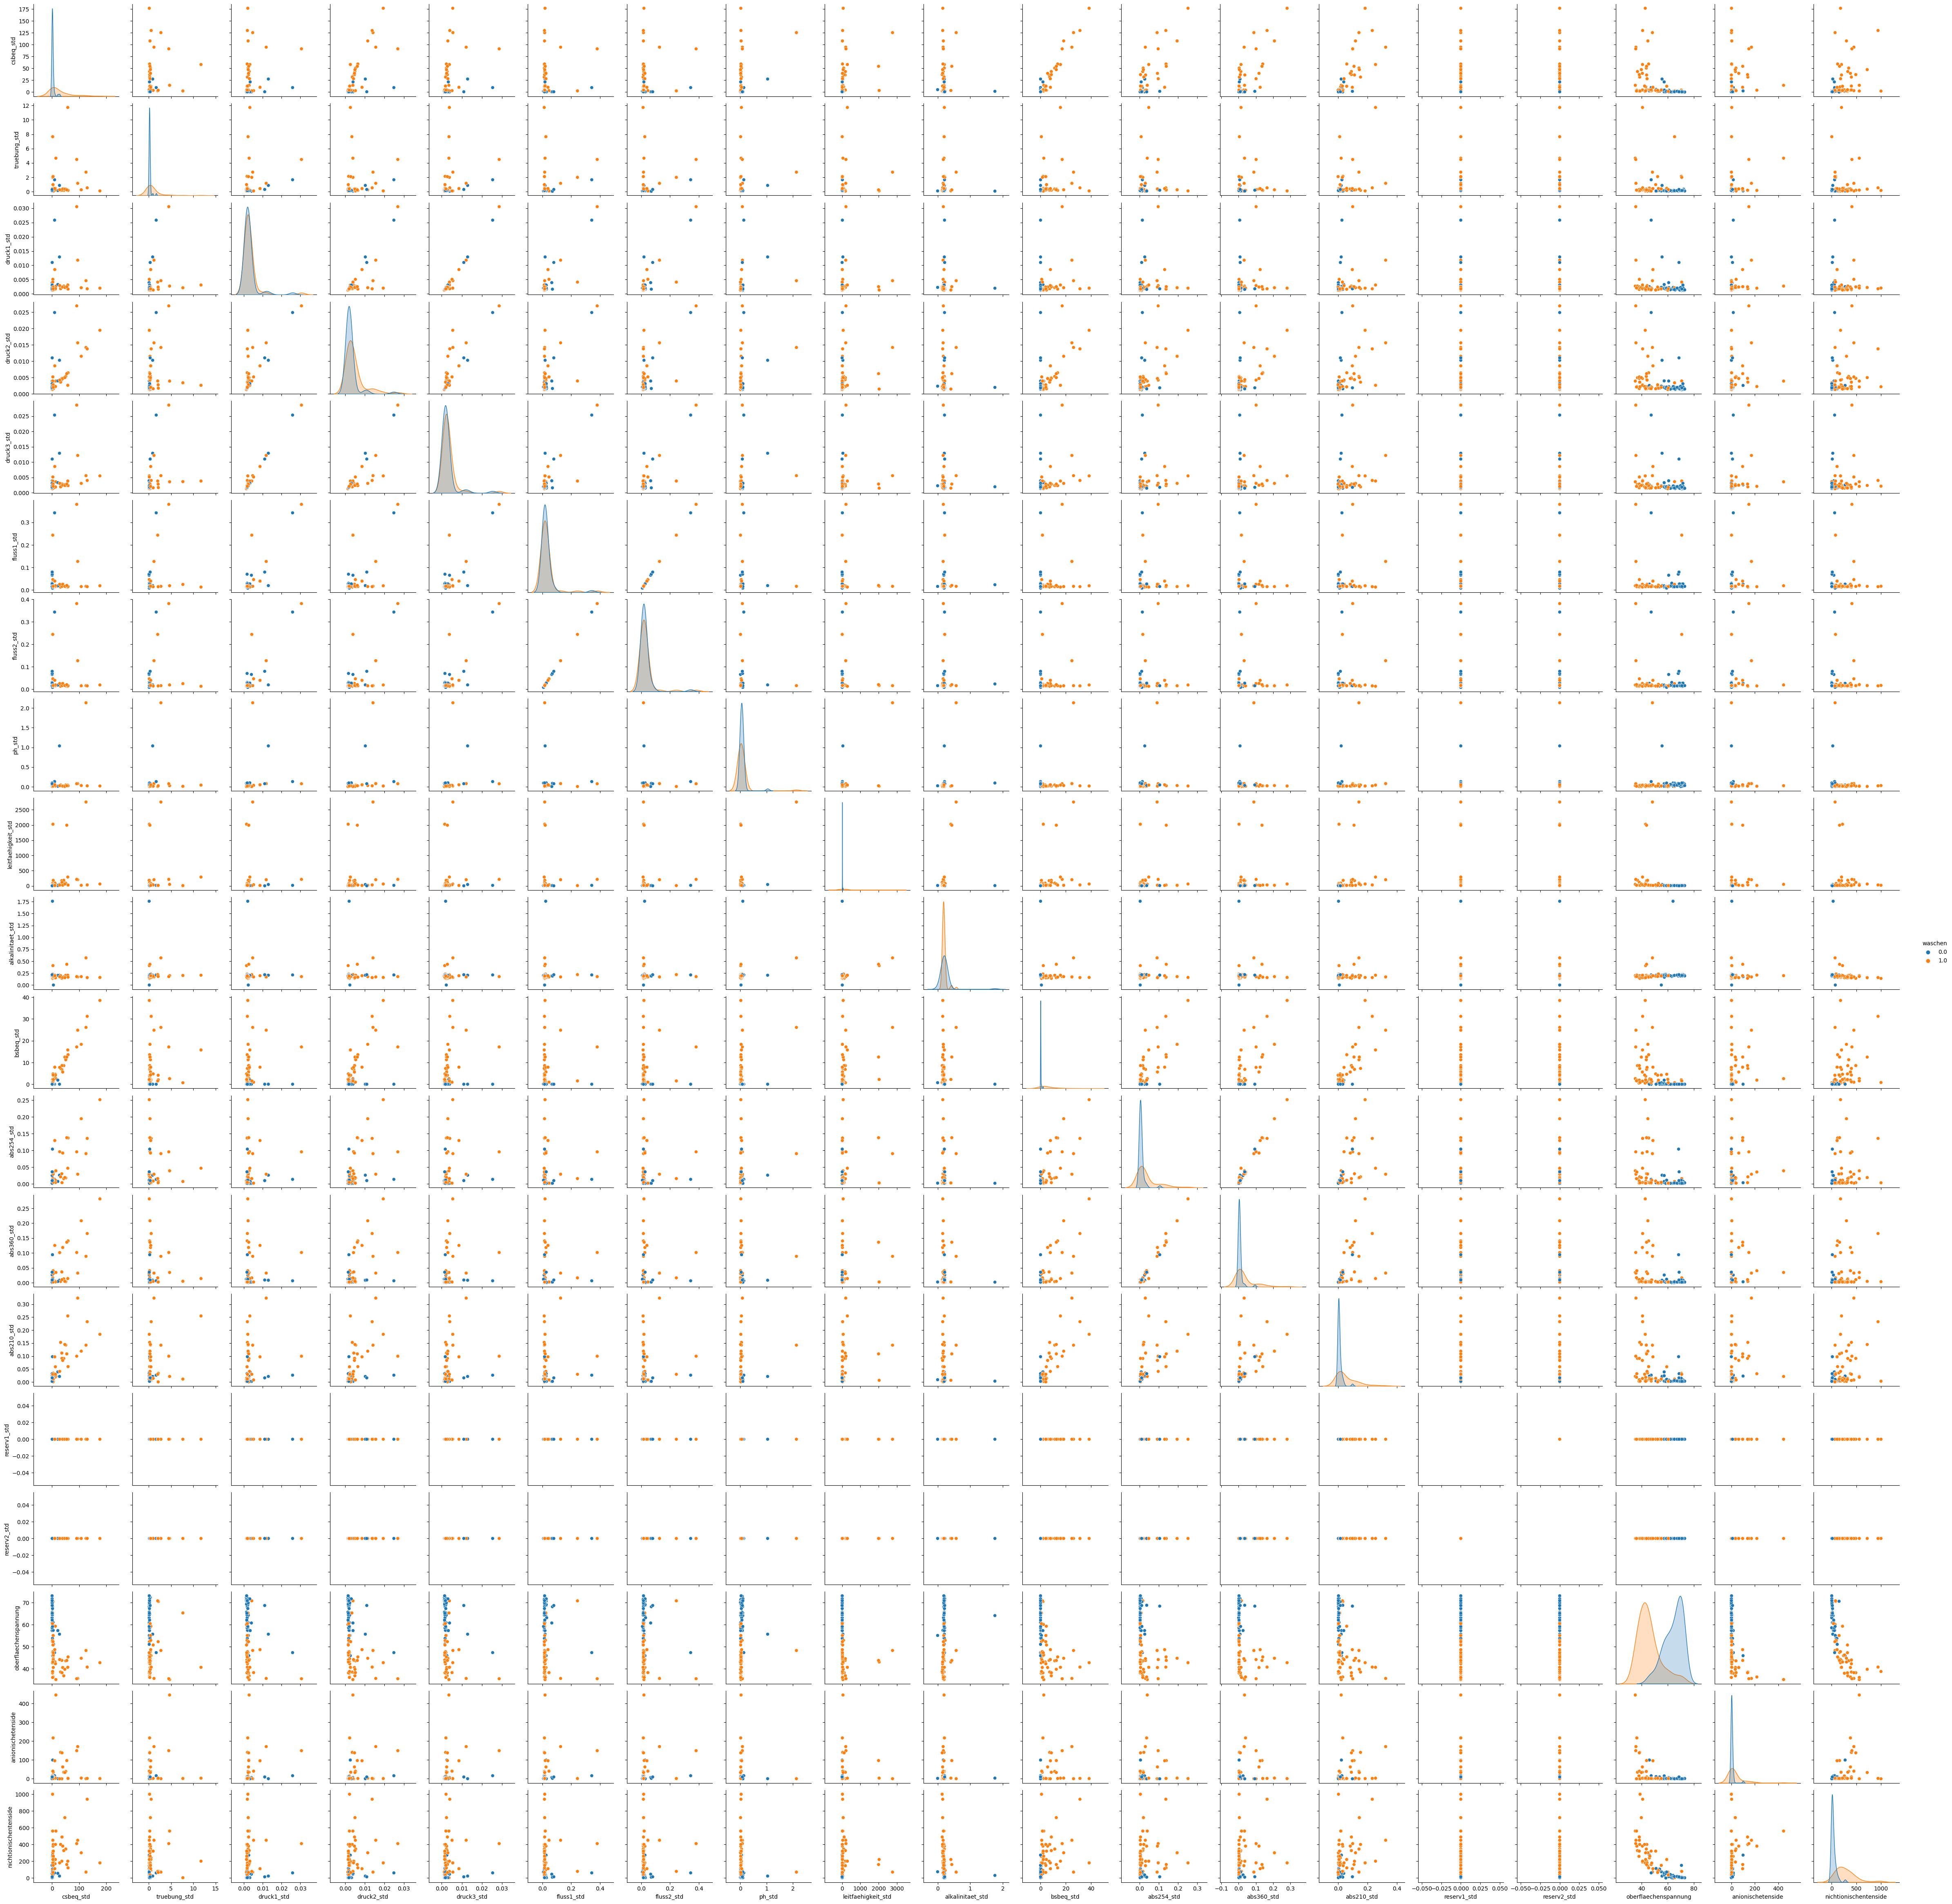

In [ ]:
std_columns = [col for col in merged_data.columns if '_std' in col] + ['waschen', 'oberflaechenspannung', 'anionischetenside', 'nichtionischentenside']
df_std_only = merged_data[std_columns]
sns.pairplot(df_std_only, hue='waschen')

<Axes: >

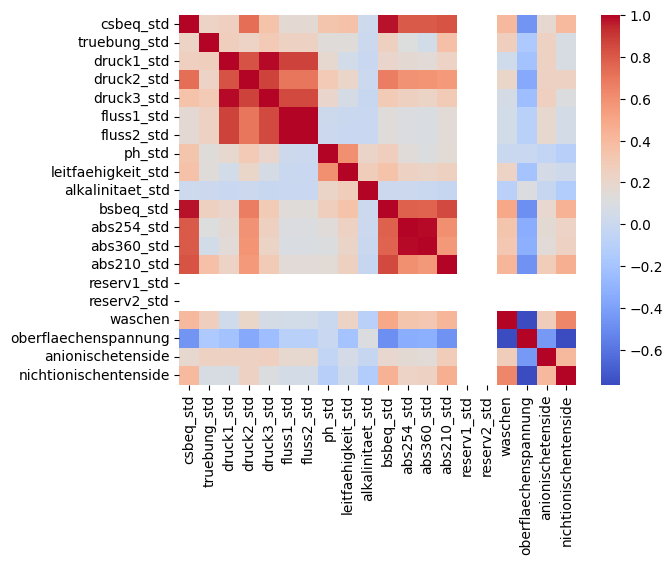

In [ ]:
sns.heatmap(df_std_only.corr(), cmap='coolwarm')

c:\Users\Illia\Desktop\IMPRESS\.venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


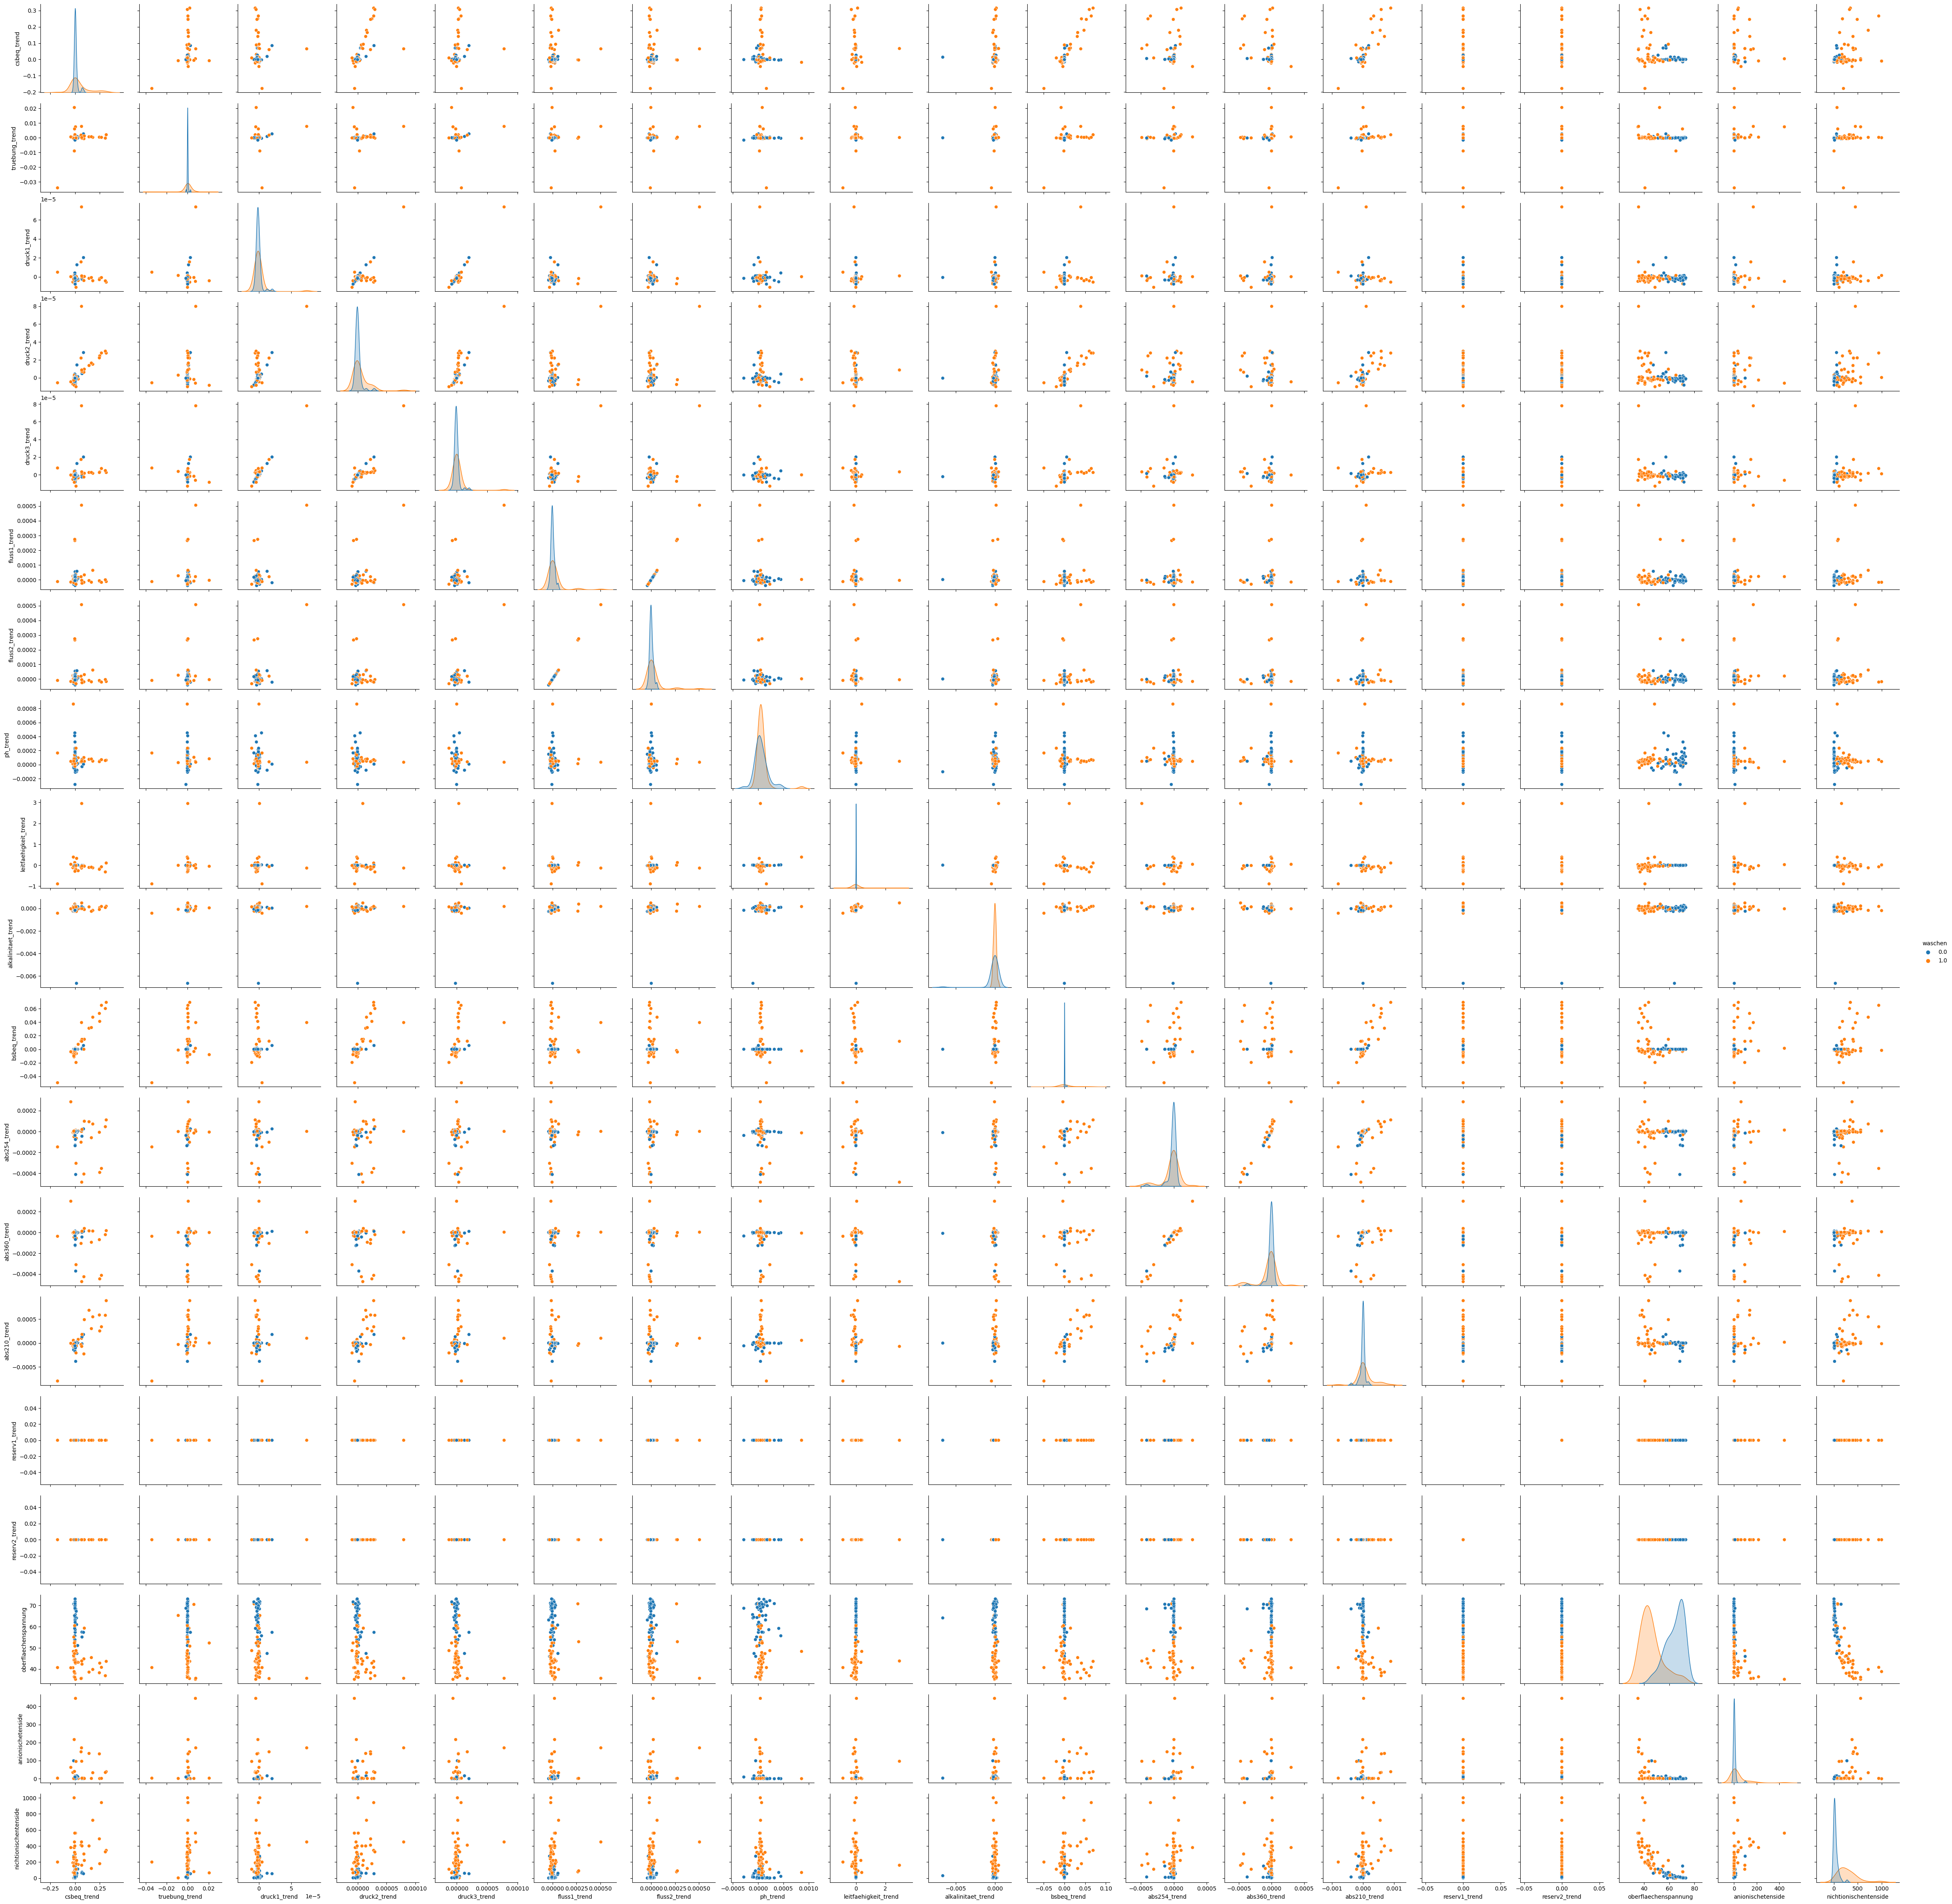

In [ ]:
trend_columns = [col for col in merged_data.columns if '_trend' in col] + ['waschen', 'oberflaechenspannung', 'anionischetenside', 'nichtionischentenside']
df_trend_only = merged_data[trend_columns]
sns.pairplot(df_trend_only, hue='waschen')

<Axes: >

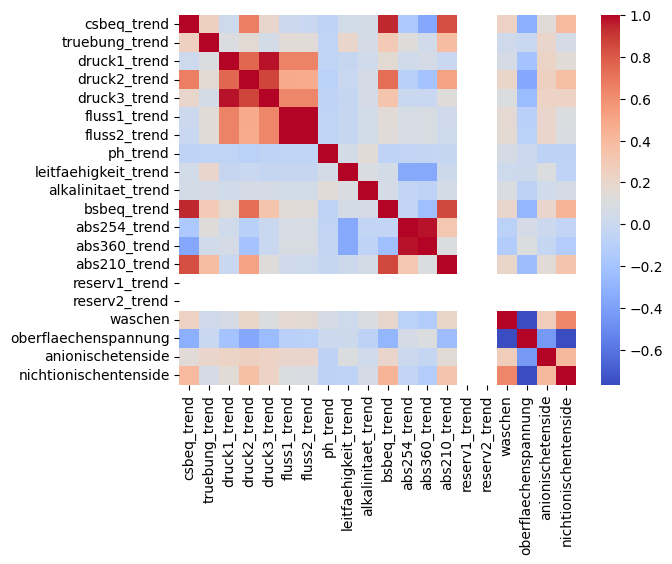

In [ ]:
sns.heatmap(df_trend_only.corr(), cmap='coolwarm')